In [43]:
# importing libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [44]:
# Loading data file into data
data=pd.read_csv('data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
# counting the missing values in columns
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [46]:
# identifying the rows and columns in data frame
data.shape

(7043, 21)

In [47]:
# column  name
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
# dropping column customerID
data=data.drop(["customerID"],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
# Adding column Total charges
data[data["TotalCharges"]==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [50]:
# converts the 'TotalCharges' column in the DataFrame data to numeric values
#The parameter errors='coerce' tells Pandas to convert invalid parsing to NaN (Not a Number).
data['TotalCharges']=pd.to_numeric(data.TotalCharges,errors='coerce')
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [51]:
#It include only those rows where the value in the tenture column is 0
data[data["tenure"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [52]:
# including those where tenture is non-zero
data=data[data["tenure"]!=0]

In [53]:
# filling missing values in column total charge with mean
data["TotalCharges"].fillna(data["TotalCharges"].mean(),inplace=True)

In [54]:
# finding unique values
data['SeniorCitizen'].nunique()

2

In [55]:
# changing categorical to numeric values
data['SeniorCitizen']=data['SeniorCitizen'].map({0:"No",1:"Yes"})
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
# fetching  all numeric columns of dataset into one
numerical_cols=['tenure','MonthlyCharges','TotalCharges']
data[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


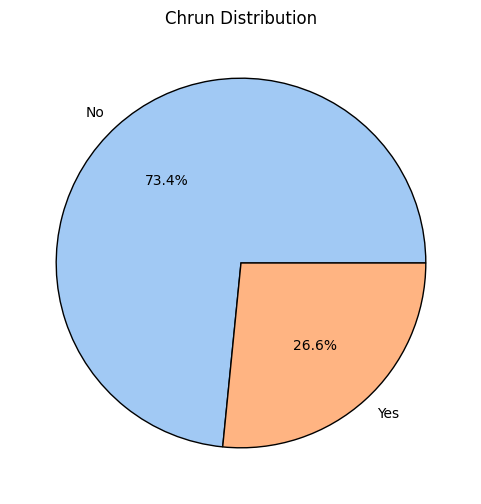

In [57]:
#prepare the data
type=["No","Yes"]
churn_counts=data['Churn'].value_counts()

# plot the pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=type, autopct='%1.1f%%',
        colors=sns.color_palette('pastel'),wedgeprops={'edgecolor':'black'})
plt.title("Chrun Distribution")
plt.show()

In [58]:
#create the cross table
contingency_table=pd.crosstab(data['Churn'],data['gender'])
#display the cross tabLE
print(contingency_table)

gender  Female  Male
Churn               
No        2544  2619
Yes        939   930


<ipython-input-59-0f3846a573c3>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  proportions = data.groupby(['Churn', 'gender']).size().groupby(level=0).apply(lambda x: x/x.sum()).reset_index(name='proportion')


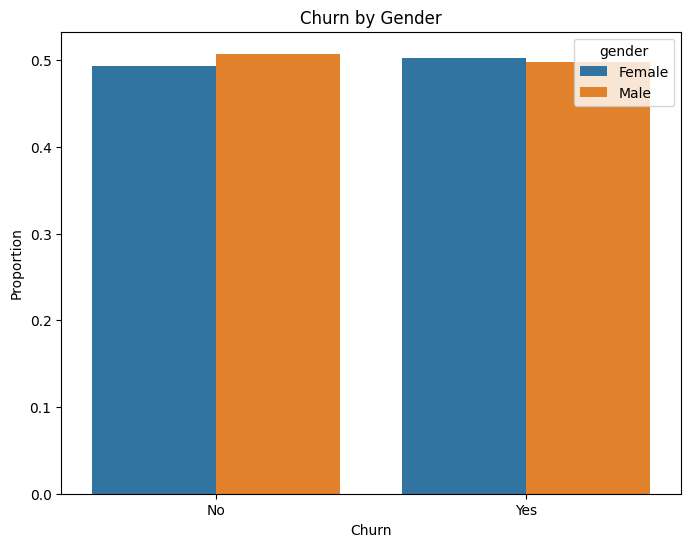

In [59]:
#calculate proportions
proportions = data.groupby(['Churn', 'gender']).size().groupby(level=0).apply(lambda x: x/x.sum()).reset_index(name='proportion')

#create the countplot
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn',y='proportion',hue='gender',data=proportions)

#add title and labels
plt.title('Churn by Gender')
plt.xlabel('Churn')
plt.ylabel('Proportion')

#show the plot
plt.show()

In [60]:
# performing the chi2 test to understand the correlation between churn and gender
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Churn'], data['gender'])

#perform the test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

#print the values
print("Chi-squared statistic:",chi2_stat)
print("P-value:",p_val)
print(expected)

Chi-squared statistic: 0.47545453727386294
P-value: 0.4904884707065509
[[2557.27090444 2605.72909556]
 [ 925.72909556  943.27090444]]


<ipython-input-61-9183e1402f0f>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  proportions = data.groupby(['Churn','Contract']).size().groupby(level=0).apply(lambda x:x/x.sum()).reset_index(name='proportion')


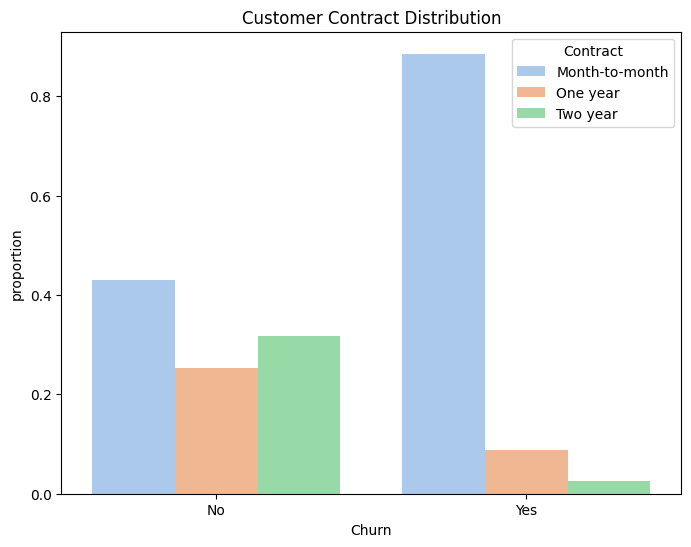

In [61]:
#Grouping them
proportions = data.groupby(['Churn','Contract']).size().groupby(level=0).apply(lambda x:x/x.sum()).reset_index(name='proportion')

plt.figure(figsize=(8,6))
sns.barplot(x='Churn',y='proportion',hue='Contract',data=proportions,
palette='pastel')

plt.title('Customer Contract Distribution')
plt.xlabel('Churn')
plt.ylabel('proportion')

#show the plot
plt.show()

In [62]:
# performing chi square test
contingency_table= pd.crosstab(data['Churn'],data['Contract'])

chi2_stat,p_val,dof,expected= chi2_contingency(contingency_table)

# print the results
print("Chi- squared statistics :",chi2_stat)
print("P-value:",p_val)

Chi- squared statistics : 1179.5458287339447
P-value: 7.326182186264635e-257


In [63]:
# getting uniques and there count in PaymentMethod column
labels=data['PaymentMethod'].unique()
values=data['PaymentMethod'].value_counts()
values

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

<ipython-input-64-4e663e7d3049>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data['MonthlyCharges'][data["Churn"] =='No'], color="Red",
<ipython-input-64-4e663e7d3049>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data['MonthlyCharges'][data["Churn"] == 'Yes'],ax =ax,


Text(0.5, 1.0, 'Distribution of monthly charges y churn')

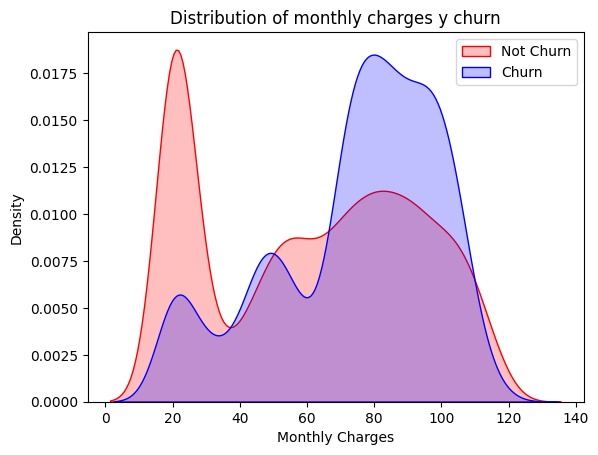

In [64]:
# kde plot
ax = sns.kdeplot(data['MonthlyCharges'][data["Churn"] =='No'], color="Red",
                 shade = True)
ax = sns.kdeplot(data['MonthlyCharges'][data["Churn"] == 'Yes'],ax =ax,
                 color="Blue", shade=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges y churn')

<ipython-input-65-bae9faf5961c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data['TotalCharges'][data["Churn"] =='No'], color="Red",
<ipython-input-65-bae9faf5961c>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data['TotalCharges'][data["Churn"] == 'Yes'],ax =ax,


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

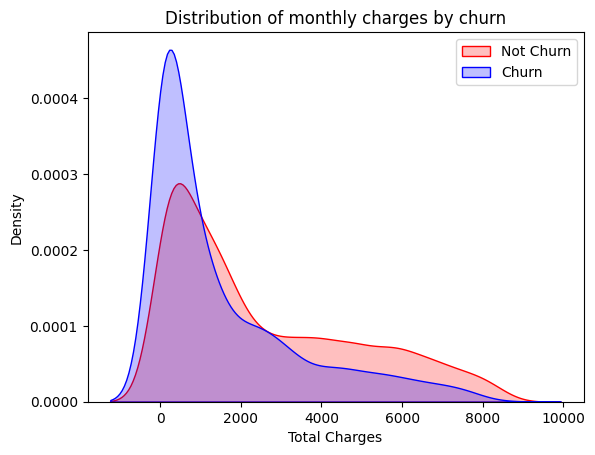

In [65]:
# kde plot
ax = sns.kdeplot(data['TotalCharges'][data["Churn"] =='No'], color="Red",
                 shade = True)
ax = sns.kdeplot(data['TotalCharges'][data["Churn"] == 'Yes'],ax =ax,
                 color="Blue", shade=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of monthly charges by churn')

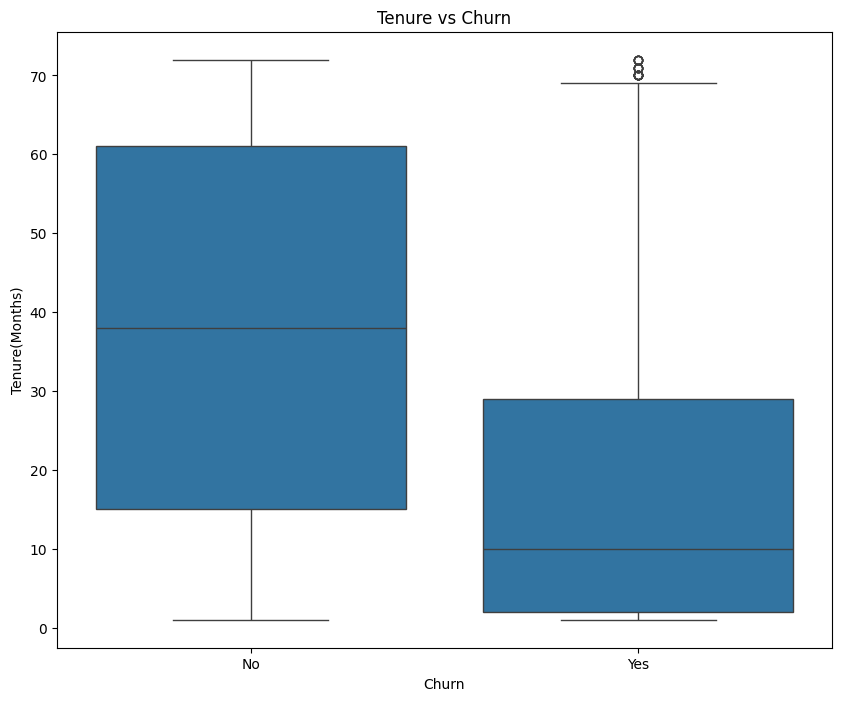

In [66]:
#create the box plot
plt.figure(figsize=(10, 8))
sns.boxplot(x='Churn',y='tenure',data=data)

#add title
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure(Months)')

#show the plot
plt.show()

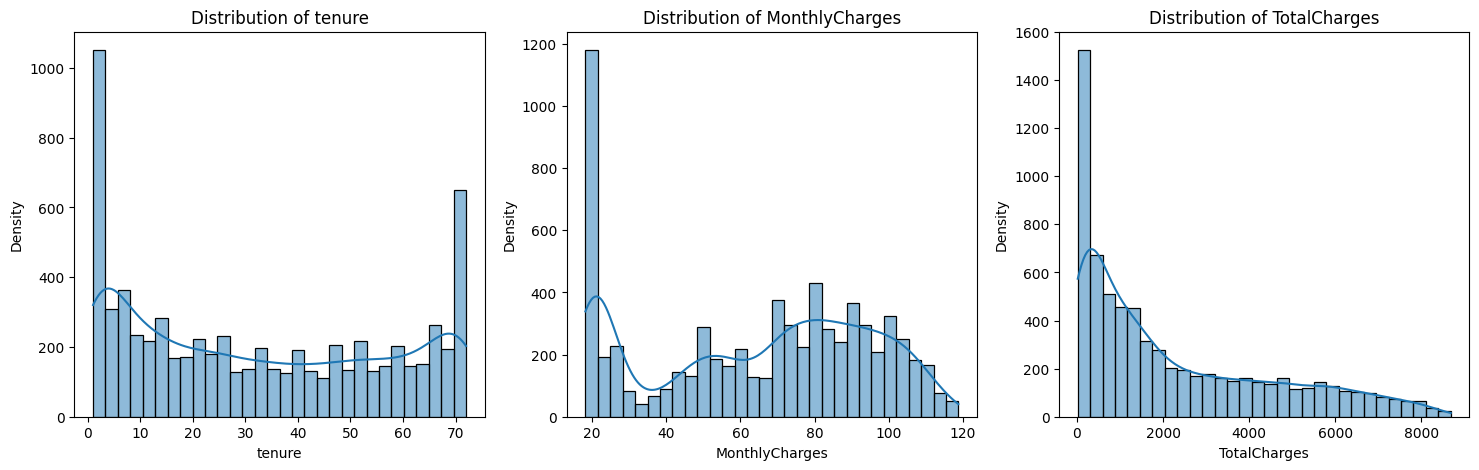

In [67]:
# Define numerical columns for distribution plotting
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
# Plot distribution for each numerical feature
plt. figure (figsize=(18, 5))
for i, feat in enumerate (num_cols) :
  plt.subplot (1, 3, i + 1)
  sns.histplot(data[feat] .dropna(), kde=True, bins=30) # Drop NA values for plotting
  plt.title(f'Distribution of {feat}')
  plt.xlabel (feat)
  plt.ylabel( 'Density')
plt. show()



In [68]:
# Identify categorical columns (excluding 'customerID' as it's a unique identifier)
categorical_columns = data.select_dtypes(include=['object']). columns

# Create dummy variables for categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [69]:
data.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [70]:
# Define features (X) and target variable (y)
X = data.drop (['Churn_Yes'], axis=1)
y = data ['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train [numerical_columns] = scaler.fit_transform(X_train [numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Confirm the first few rows of the scaled training data
X_train. head ()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6030,0.434674,-0.518620,-0.087908,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
3410,-1.195652,-0.374443,-0.921285,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5483,0.923772,0.432616,0.963781,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
5524,0.516190,-0.333013,0.122920,1,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6337,0.923772,1.199902,1.401088,0,0,1,1,1,0,1,...,0,1,0,1,1,0,0,0,0,1


In [71]:
#Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logreg.fit(X_train, Y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test , y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test , y_pred)

accuracy, conf_matrix


(0.7882018479033405,
 array([[916, 117],
        [181, 193]]))

In [72]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logreg. fit (X_train, Y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(Y_test , y_pred)

accuracy, conf_matrix

(0.7882018479033405,
 array([[916, 117],
        [181, 193]]))

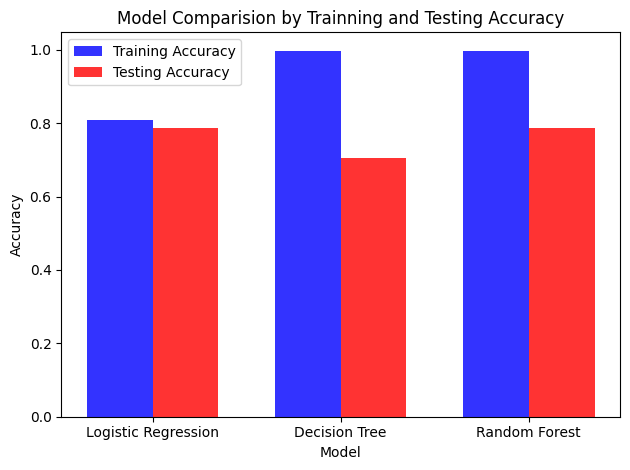

In [73]:
#Initialize the decision tree and random forest models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)

# Fit the models to the training data
decision_tree.fit(X_train,Y_train)
random_forest.fit(X_train, Y_train)

# Predict on the training and testing sets
y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict (X_test)

# Calculate accuracy for decision tree
accuracy_train_dt = accuracy_score(Y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(Y_test, y_pred_test_dt)

# Calculate accuracy for random forest
accuracy_train_rf = accuracy_score(Y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(Y_test, y_pred_test_rf)

# Predict on the training set for logistic regression to compare training performance
y_pred_train_lr = logreg.predict(X_train)
accuracy_train_lr = accuracy_score(Y_train, y_pred_train_lr)

# Prepare data for plotting
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_train = [accuracy_train_lr, accuracy_train_dt, accuracy_train_rf]
accuracy_test=[accuracy,accuracy_test_dt,accuracy_test_rf]
# 'accuracy' is already calculated for logistic regression

# Plotting
fig,ax= plt.subplots()
index = range (len(models))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, accuracy_train, bar_width,
                alpha=opacity, color='b', label='Training Accuracy')

rects2 = ax.bar([p + bar_width for p in index], accuracy_test, bar_width,
                alpha=opacity, color='r', label ='Testing Accuracy')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Comparision by Trainning and Testing Accuracy')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

In [74]:
# Calculate AUC for logistic regression
auc_lr = roc_auc_score(Y_test, logreg.predict_proba(X_test) [:, 1])

# Calculate AUC for decision tree
auc_dt = roc_auc_score(Y_test, decision_tree.predict_proba(X_test) [:, 1])

# Calculate AUC for random forest
auc_rf = roc_auc_score(Y_test, random_forest.predict_proba(X_test) [:, 1])

print(f'AUC of Logistic Regression: {auc_lr}')
print(f'AUC of Decision Tree: {auc_dt}')
print(f'AUC of Random Forest: {auc_rf}')

AUC of Logistic Regression: 0.8319778848792002
AUC of Decision Tree: 0.6403251523261773
AUC of Random Forest: 0.8165459618679822


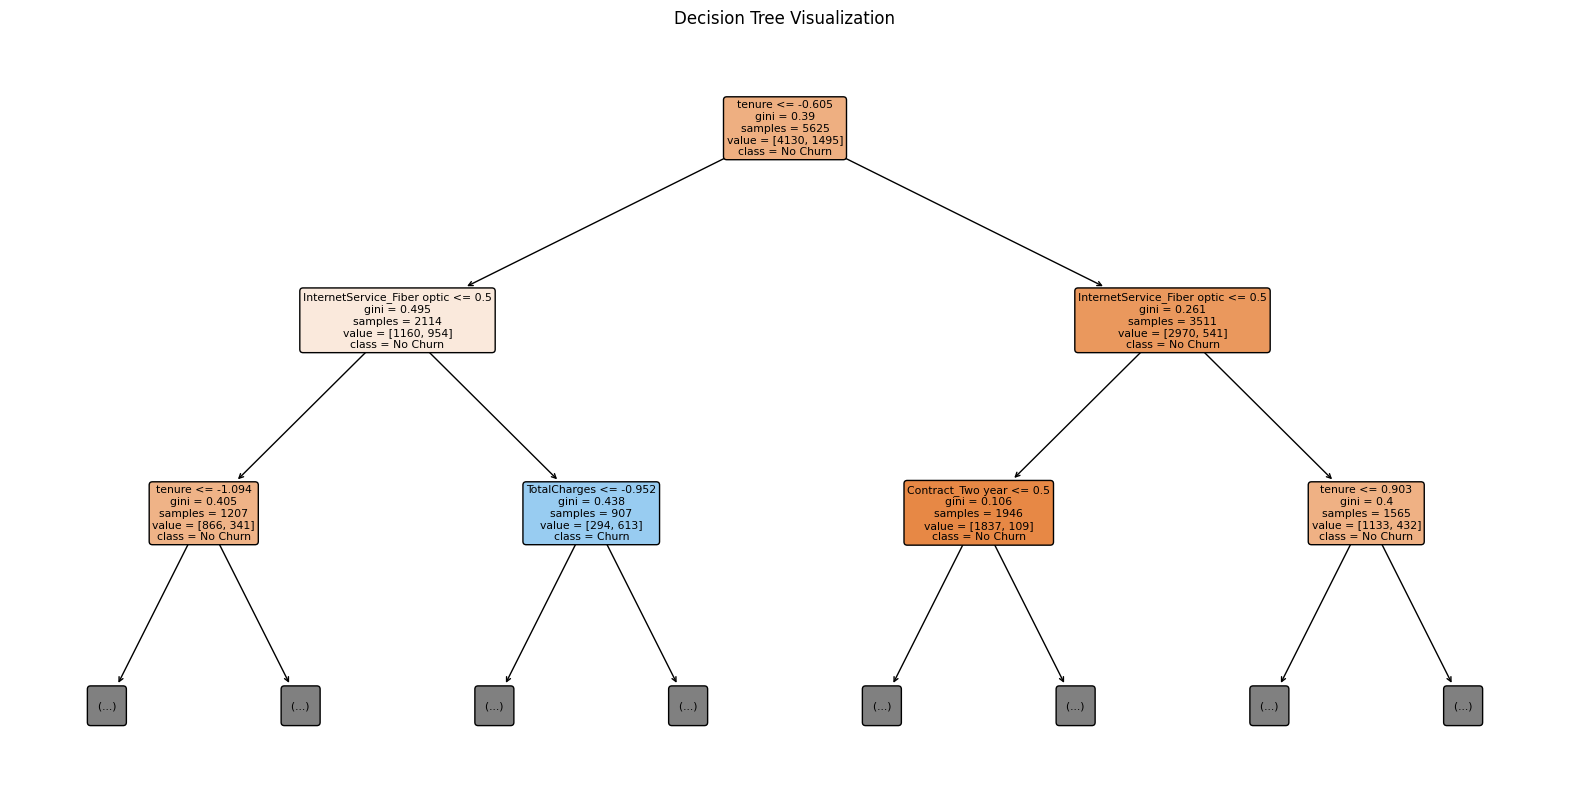

In [75]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt. figure(figsize=(20,10))
plot_tree(decision_tree, filled= True, rounded=True, class_names=['No Churn', 'Churn'],
          feature_names=list(X. columns) , max_depth=2)  # Limit depth for readability
plt. title("Decision Tree Visualization")
plt. show()

In [76]:
# Extract coefficients from the logistic regression model
coefficients = logreg.coef_[0]

# Create a DataFrame to visualize the coefficients (importance) of features
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient' :
                                coefficients})

# Sort the DataFrame by the absolute values of coefficients for importance
coefficients_df = coefficients_df.sort_values(by='Coefficient', key=abs,
                                              ascending=False)

<ipython-input-77-fa308741dbd3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_features_df,


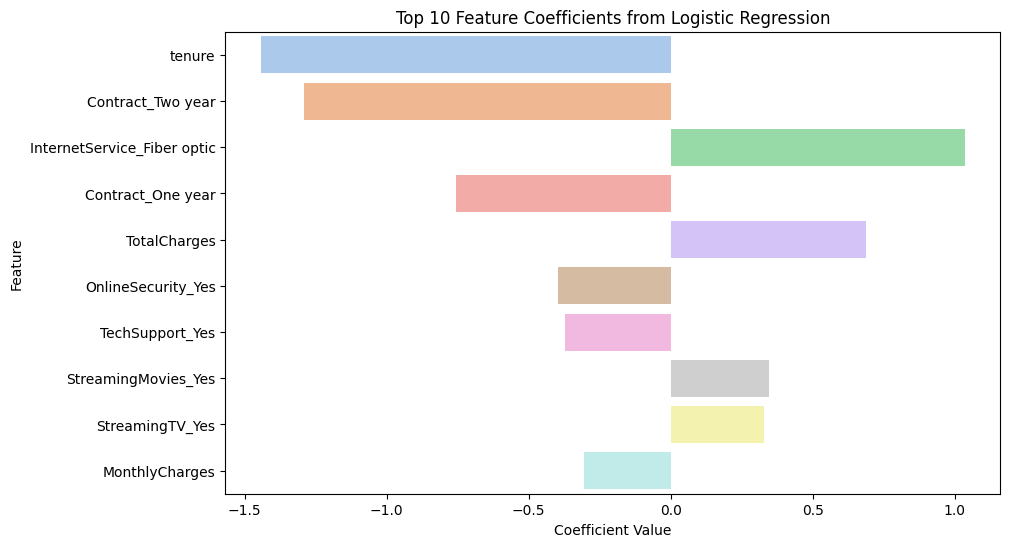

In [77]:
#Plotting the top 10 most impactful features from logistic regression
top_features_df = coefficients_df.head(10)

plt.figure(figsize= (10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_features_df,
            palette="pastel")
plt. title('Top 10 Feature Coefficients from Logistic Regression')
plt. xlabel( 'Coefficient Value')
plt. ylabel ('Feature')
plt. show()

In [ ]:
!jupyter nbconvert --to html CustomerChurnPredicition_KanakSharma.ipynb

[NbConvertApp] Converting notebook CustomerChurnPredicition_KanakSharma.ipynb to html
[NbConvertApp] Writing 1234008 bytes to CustomerChurnPredicition_KanakSharma.html
